In [1]:
# import numpy as np
# import pandas as pd

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# import seaborn as sns

# import tensorflow as tf
# from tensorflow import keras

In [2]:
# READ FROM CSV AND CREATE A DATA FRAME

import pandas as pd

df = pd.read_csv('./kidney_disease.csv')
# print(df)
df = df.sample(frac=1).reset_index(drop=True)
print(df.head)

<bound method NDFrame.head of       id   age     bp     sg   al   su       rbc        pc         pcc  \
0    100  34.0   70.0  1.015  4.0  0.0  abnormal  abnormal  notpresent   
1     82  38.0   70.0    NaN  NaN  NaN       NaN       NaN  notpresent   
2    201  64.0   70.0    NaN  NaN  NaN       NaN       NaN  notpresent   
3     56  76.0   70.0  1.015  3.0  4.0    normal  abnormal     present   
4    232  50.0   90.0  1.015  1.0  0.0  abnormal  abnormal  notpresent   
..   ...   ...    ...    ...  ...  ...       ...       ...         ...   
395   88  58.0  110.0  1.010  4.0  0.0       NaN    normal  notpresent   
396  119  60.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent   
397  297  53.0   60.0  1.025  0.0  0.0    normal    normal  notpresent   
398  157  62.0   70.0  1.025  3.0  0.0    normal  abnormal  notpresent   
399   29  68.0   70.0  1.005  1.0  0.0  abnormal  abnormal     present   

             ba  ...  pcv     wc   rc  htn   dm  cad appet   pe  ane  \
0    notp

In [3]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [4]:
df.drop('id', axis = 1, inplace = True)

# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
print(len(df.columns))
print(df.head())
df.describe()

25
    age  blood_pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  34.0            70.0             1.015      4.0    0.0        abnormal   
1  38.0            70.0               NaN      NaN    NaN             NaN   
2  64.0            70.0               NaN      NaN    NaN             NaN   
3  76.0            70.0             1.015      3.0    4.0          normal   
4  50.0            90.0             1.015      1.0    0.0        abnormal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0  abnormal      notpresent  notpresent                 153.0  ...   
1       NaN      notpresent  notpresent                 104.0  ...   
2       NaN      notpresent  notpresent                 113.0  ...   
3  abnormal         present  notpresent                   NaN  ...   
4  abnormal      notpresent  notpresent                   NaN  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                 NaN                     

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [5]:
# converting necessary columns to numerical type

df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [6]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

# looking at unique values in categorical columns
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has ['abnormal' nan 'normal'] values

pus_cell has ['abnormal' nan 'normal'] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['no' 'yes' nan] values

diabetes_mellitus has ['no' 'yes' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['yes' 'no' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values



In [7]:
# replace incorrect values

# df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

# df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

# df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'notckd'})

df['class'] = df['class'].map({'ckd': 1, 'notckd': 0})

df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [8]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['no' 'yes' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [1 0] values



In [9]:
# for col in num_cols:
#     print(f"{col} has {df[col].unique()} values\n")

# cat_cols.append("specific_gravity")
# cat_cols.append("albumin")
# cat_cols.append("sugar")

# num_cols.remove("specific_gravity")
# num_cols.remove("albumin")
# num_cols.remove("sugar")

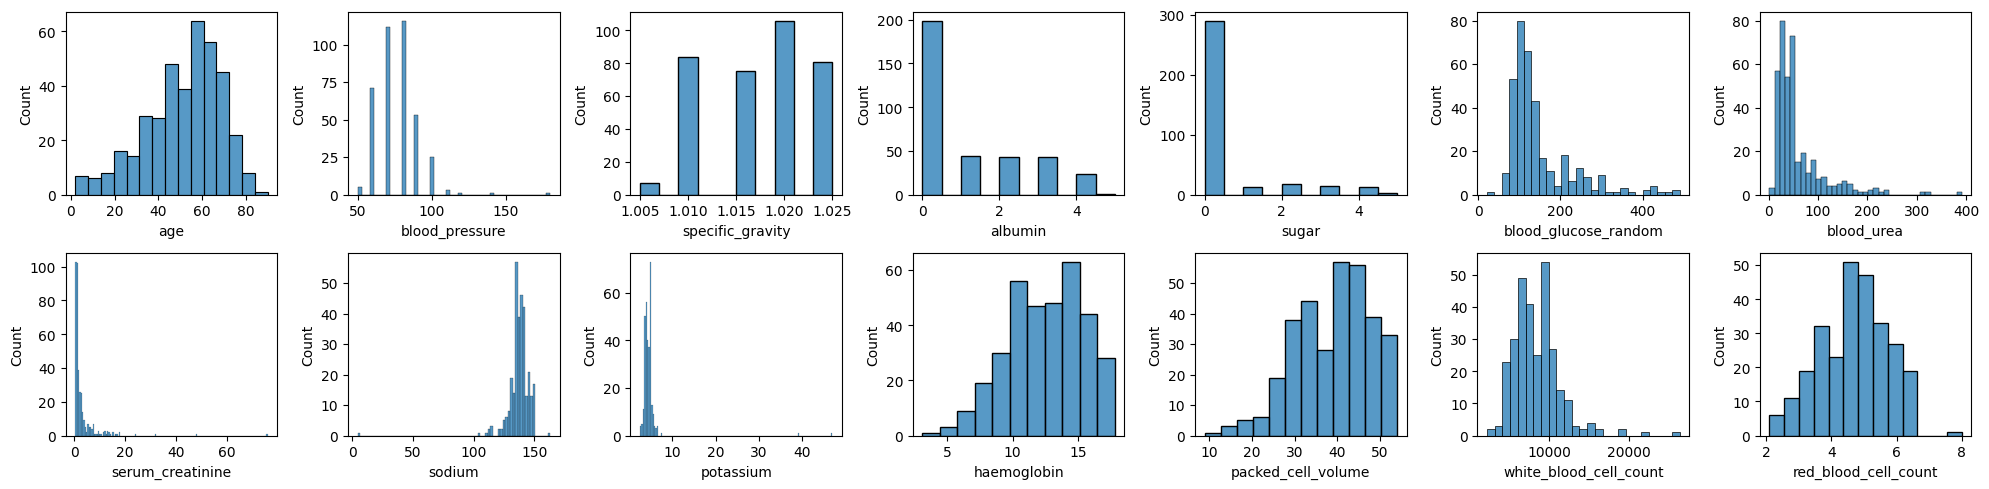

In [10]:
# checking numerical features distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20, 5))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(2, 7, plotnumber)
        # sns.distplot(df[column])
        sns.histplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

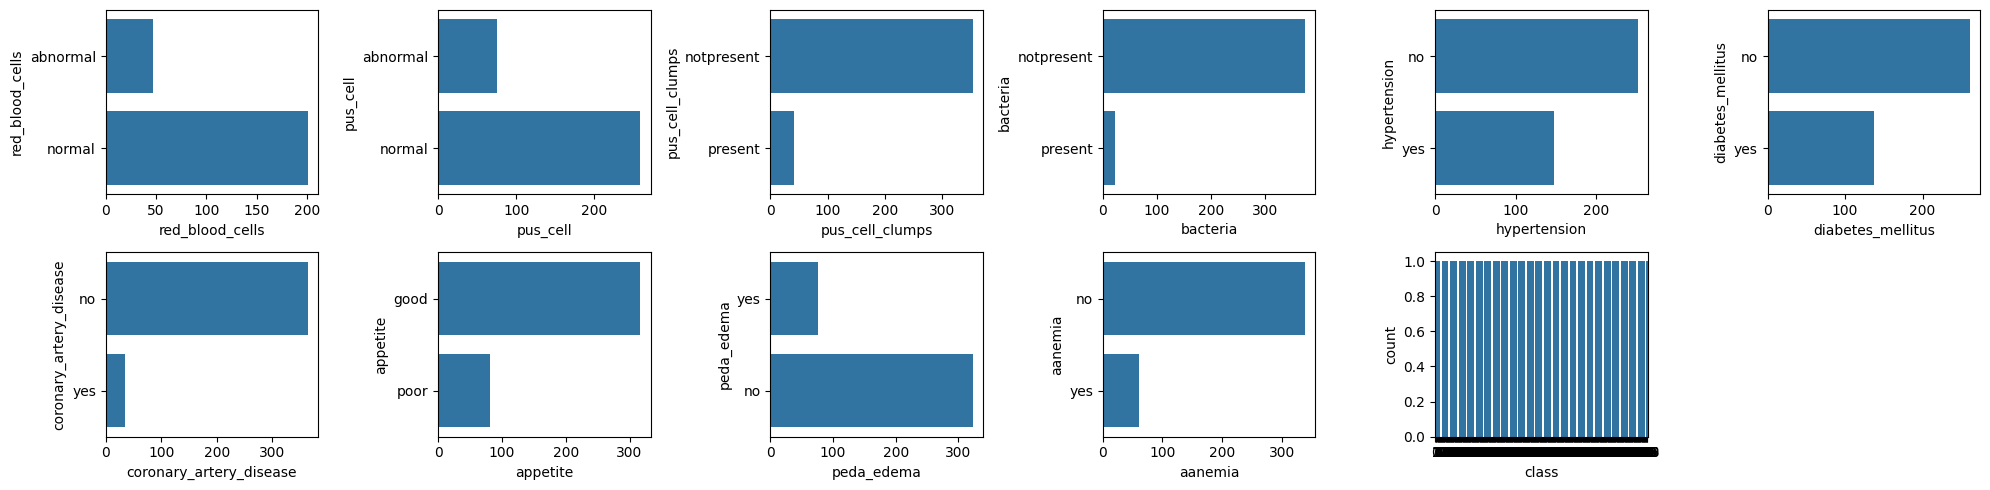

In [11]:
# looking at categorical columns

plt.figure(figsize = (20, 5))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(2, 6, plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

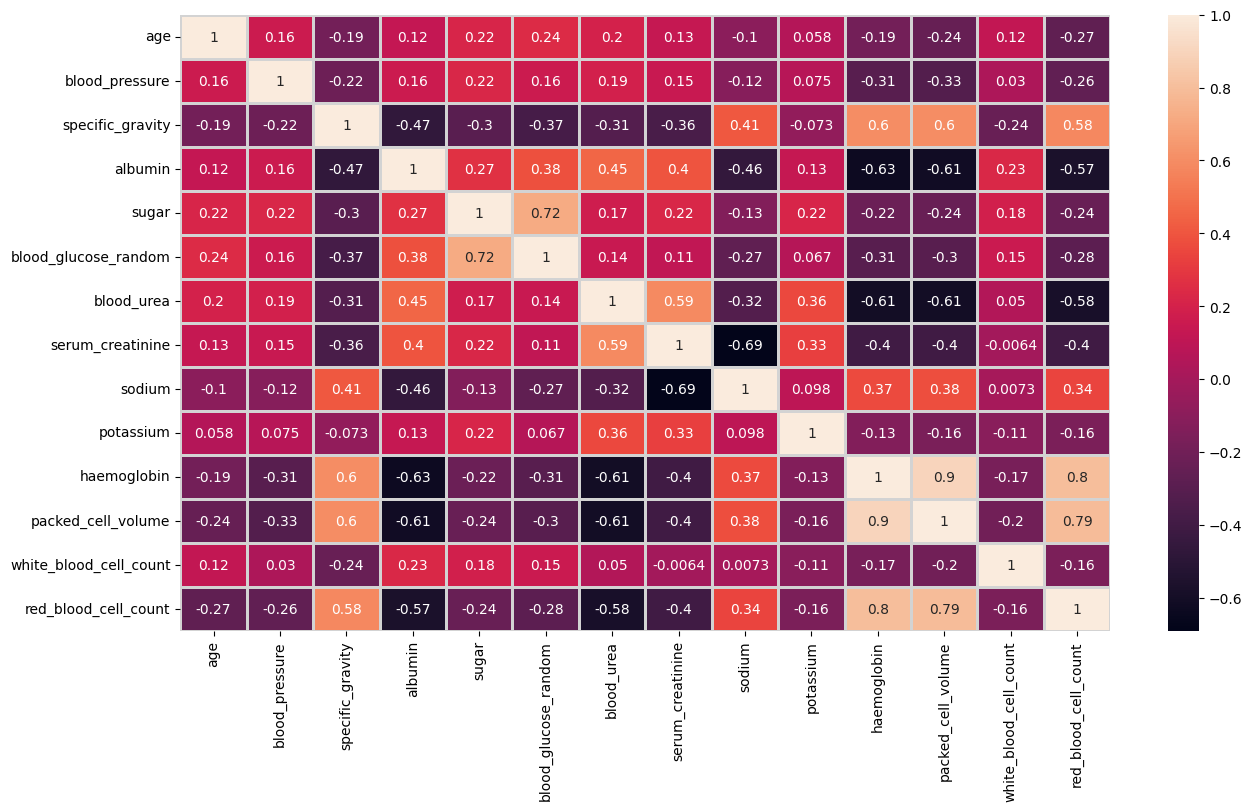

In [12]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols].corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [13]:
# plt.figure(figsize = (15, 8))
# sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
# plt.show()

In [14]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [15]:
print(df["age"].isna().sum())
r = df["age"].dropna().sample(df["age"].isna().sum())
print(r)
r.index = df[df["age"].isnull()].index
print(r.index)
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    # Take N number of random samples from the feature where N = number of NA values
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

9
308    21.0
392    50.0
124    60.0
20     59.0
93     65.0
360    48.0
160    24.0
236    59.0
228    74.0
Name: age, dtype: float64
Index([35, 68, 126, 182, 221, 240, 262, 349, 391], dtype='int64')


In [16]:
# def random_value_imputation_by_class(feature):
#     # Take N number of random samples from the feature where N = number of NA values
#     random_sample = df[feature].dropna().sample(df[feature].isna().sum())
#     random_sample.index = df[df[feature].isnull()].index
#     df.loc[df[feature].isnull(), feature] = random_sample
    
# def impute_mode_by_class(feature):
#     mode = df[feature].mode()[0]
#     df[feature] = df[feature].fillna(mode)

# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=5, weights="uniform")
# imputer.fit_transform(df)

ValueError: could not convert string to float: 'abnormal'

In [ ]:
for col in num_cols:
    random_value_imputation(col)

In [ ]:
df[num_cols].isnull().sum()

In [ ]:
for col in cat_cols:
    print(col)
    print(df.loc[col])
    impute_mode(col)

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# NEW FIND: TREE BASED MODELS PERFORM BAD AFTER SCALING.
# AFTER SCALING OTHER MODELS SUCH AS SVM, KNN HAD BETTER RESULTS
# AFTER SCALING THE ACCURACY OF DT, RF WORSENED TO 98% FROM 99+%

# # Scaling the numerical columns
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# df[num_cols] = scaler.fit_transform(df[num_cols])
# df[num_cols]

In [ ]:
df.head()

In [ ]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

x = df[ind_col]
y = df[dep_col]

In [ ]:
# from imblearn.over_sampling import SMOTE

# oversample = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=10, n_jobs=-1)
# x, y = oversample.fit_resample(x, y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

grid_param = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 10, 12, 15, 20],
    'min_samples_split' : [2, 3, 5, 7],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'max_features' : ['sqrt', 'log2']
}

grid_search_dt = GridSearchCV(dt, grid_param, cv = 5, n_jobs = -1, verbose = 3)
grid_search_dt.fit(x_train, y_train)



# best parameters and best score
print(grid_search_dt.best_params_)
print(grid_search_dt.best_score_)
print(grid_search_dt.best_estimator_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# dt = DecisionTreeClassifier(max_depth=5, max_features='log2', min_samples_split=7)
dt = grid_search_dt.best_estimator_
dt.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dt_acc = accuracy_score(y_test, dt.predict(x_test))

print(f"Training Accuracy of Decision Tree is {accuracy_score(y_train, dt.predict(x_train))}")
print(f"Test Accuracy of Decision Tree is {dt_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dt.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dt.predict(x_test))}")

In [ ]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# dt_acc = accuracy_score(y_test, dt.predict(x_test))

# print(f"Training Accuracy of Decision Tree is {accuracy_score(y_train, dt.predict(x_train))}")
# print(f"Testing Accuracy of Decision Tree is {dt_acc} \n")

# print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dt.predict(x_test))}\n")
# print(f"Classification Report :- \n {classification_report(y_test, dt.predict(x_test))}")

In [ ]:
# # hyper parameter tuning of random forest

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import matplotlib.pyplot as plt

# rf = RandomForestClassifier()
# rf.fit(x_train, y_train)


# from sklearn.model_selection import GridSearchCV
# grid_param = {
#     'criterion' : ['gini', 'entropy', 'log_loss'],
#     'max_depth' : [3, 5, 7, 10],
#     'class_weight': ['balanced', 
#                      'balanced_subsample'
#                      ],
#     'min_samples_leaf' : [1, 3, 5, 7],
#     'min_samples_split' : [2, 3, 5, 7],
#     'max_features' : ['sqrt', 'log2']
# }

# grid_search_rf = GridSearchCV(rf, grid_param, cv = 5, n_jobs = -1, verbose = 3)
# grid_search_rf.fit(x_train, y_train)



# # best parameters and best score
# print(grid_search_rf.best_params_)
# print(grid_search_rf.best_score_)
# print(grid_search_rf.best_estimator_)

In [ ]:
# from sklearn.metrics import accuracy_score
# from sklearn.tree import DecisionTreeClassifier

# dt = DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_split=7)
# dt.fit(x_train, y_train)
# dt_acc = accuracy_score(y_test, dt.predict(x_test))
# print(dt_acc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier(class_weight='balanced', max_depth=7, max_features='log2', min_samples_leaf=3, min_samples_split=5)
# rf = grid_search_rf.best_estimator_
rf.fit(x_train, y_train)
# accuracy score, confusion matrix and classification report of RANDOM FOREST

rf_acc = accuracy_score(y_test, rf.predict(x_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rf.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rf.predict(x_test))}")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_val_score(dt, x, y, cv=kf)

print(f'Cross-Validation Results (Accuracy) DT: {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_val_score(rf, x, y, cv=kf)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

In [ ]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error

def error_report(model):
    mse = mean_squared_error(y_test, model.predict(x_test))
    print(f"Mean Squared Error: {mse}")
    rmse = root_mean_squared_error(y_test, model.predict(x_test))
    print(f"Root Mean Squared Error: {rmse}")
    mae = mean_absolute_error(y_test, model.predict(x_test))
    print(f"Mean Absolute Error: {mae}")

error_report(dt)
print()
error_report(rf)

In [ ]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./ckd-dt.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(dt, file)

In [ ]:
# SAVING THE MODEL USING PICKLE PACKAGE
import pickle

# save the iris classification model as a pickle file
model_pkl_file = "./ckd-rf.pkl"

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(rf, file)